### 1) Importing the libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


### 2) Loading the Dataset

In [126]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### 3) Understanding the Data

In [127]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age: The age of the patient in years.

sex: The gender of the patient (1 = male, 0 = female).

cp: Type of chest pain experienced (e.g., 1: typical angina, 2: atypical angina).

trestbps: Resting blood pressure (in mm Hg on admission to the hospital).

chol: Serum cholestoral in mg/dl.

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Resting electrocardiographic results (values 0, 1, 2).

thalach: Maximum heart rate achieved during a stress test.

exang: Exercise-induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment.

ca: Number of major vessels (0-3) colored by flourosopy.

thal: A blood disorder called thalassemia (e.g., 3 = normal; 6 = fixed defect; 7 = reversible defect).

target: The patient's heart disease status (0 = no disease, 1 = presence of disease).

In [128]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [129]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [130]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### 4) Data Cleaning

#### 4 major steps involved in Data Cleaning
##### 1) Check for Duplicate values
##### 2) Check for null values
##### 3) Check for Data types
##### 4) Remove the unwanted row or column

In [131]:
#Checking for duplicate values
#this one gives the individual result
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [132]:
df.duplicated().any()

True

In [133]:
df.shape

(1025, 14)

In [134]:
df.drop_duplicates(inplace=True)
print("\nDuplicate rows have been removed.")
print(f"New shape of the dataset: {df.shape}")


Duplicate rows have been removed.
New shape of the dataset: (302, 14)


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [136]:
# Separate features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

##### 5) Splitting the Data into Training and Testing 

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into training and testing sets:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data split into training and testing sets:
Training set size: 241 samples
Testing set size: 61 samples


##### 6) Training the Model

In [138]:
# =============================================================================
# --- Step 1: Train a Decision Tree Classifier and Visualize ---
# =============================================================================
print("--- Step 1: Training a Full-Sized Decision Tree ---")
# Create a classifier with no restrictions on depth
uncontrolled_tree = DecisionTreeClassifier(random_state=42)
uncontrolled_tree.fit(X_train, y_train)
print("Full-sized tree trained.\n")
# Note: Visualization for this tree is very large and complex. It's a good example of an overfit model.
# plt.figure(figsize=(25, 15)); plot_tree(uncontrolled_tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True); plt.title("Step 1: Uncontrolled Tree"); plt.show()

--- Step 1: Training a Full-Sized Decision Tree ---
Full-sized tree trained.



Full-sized tree trained. Now visualizing it...


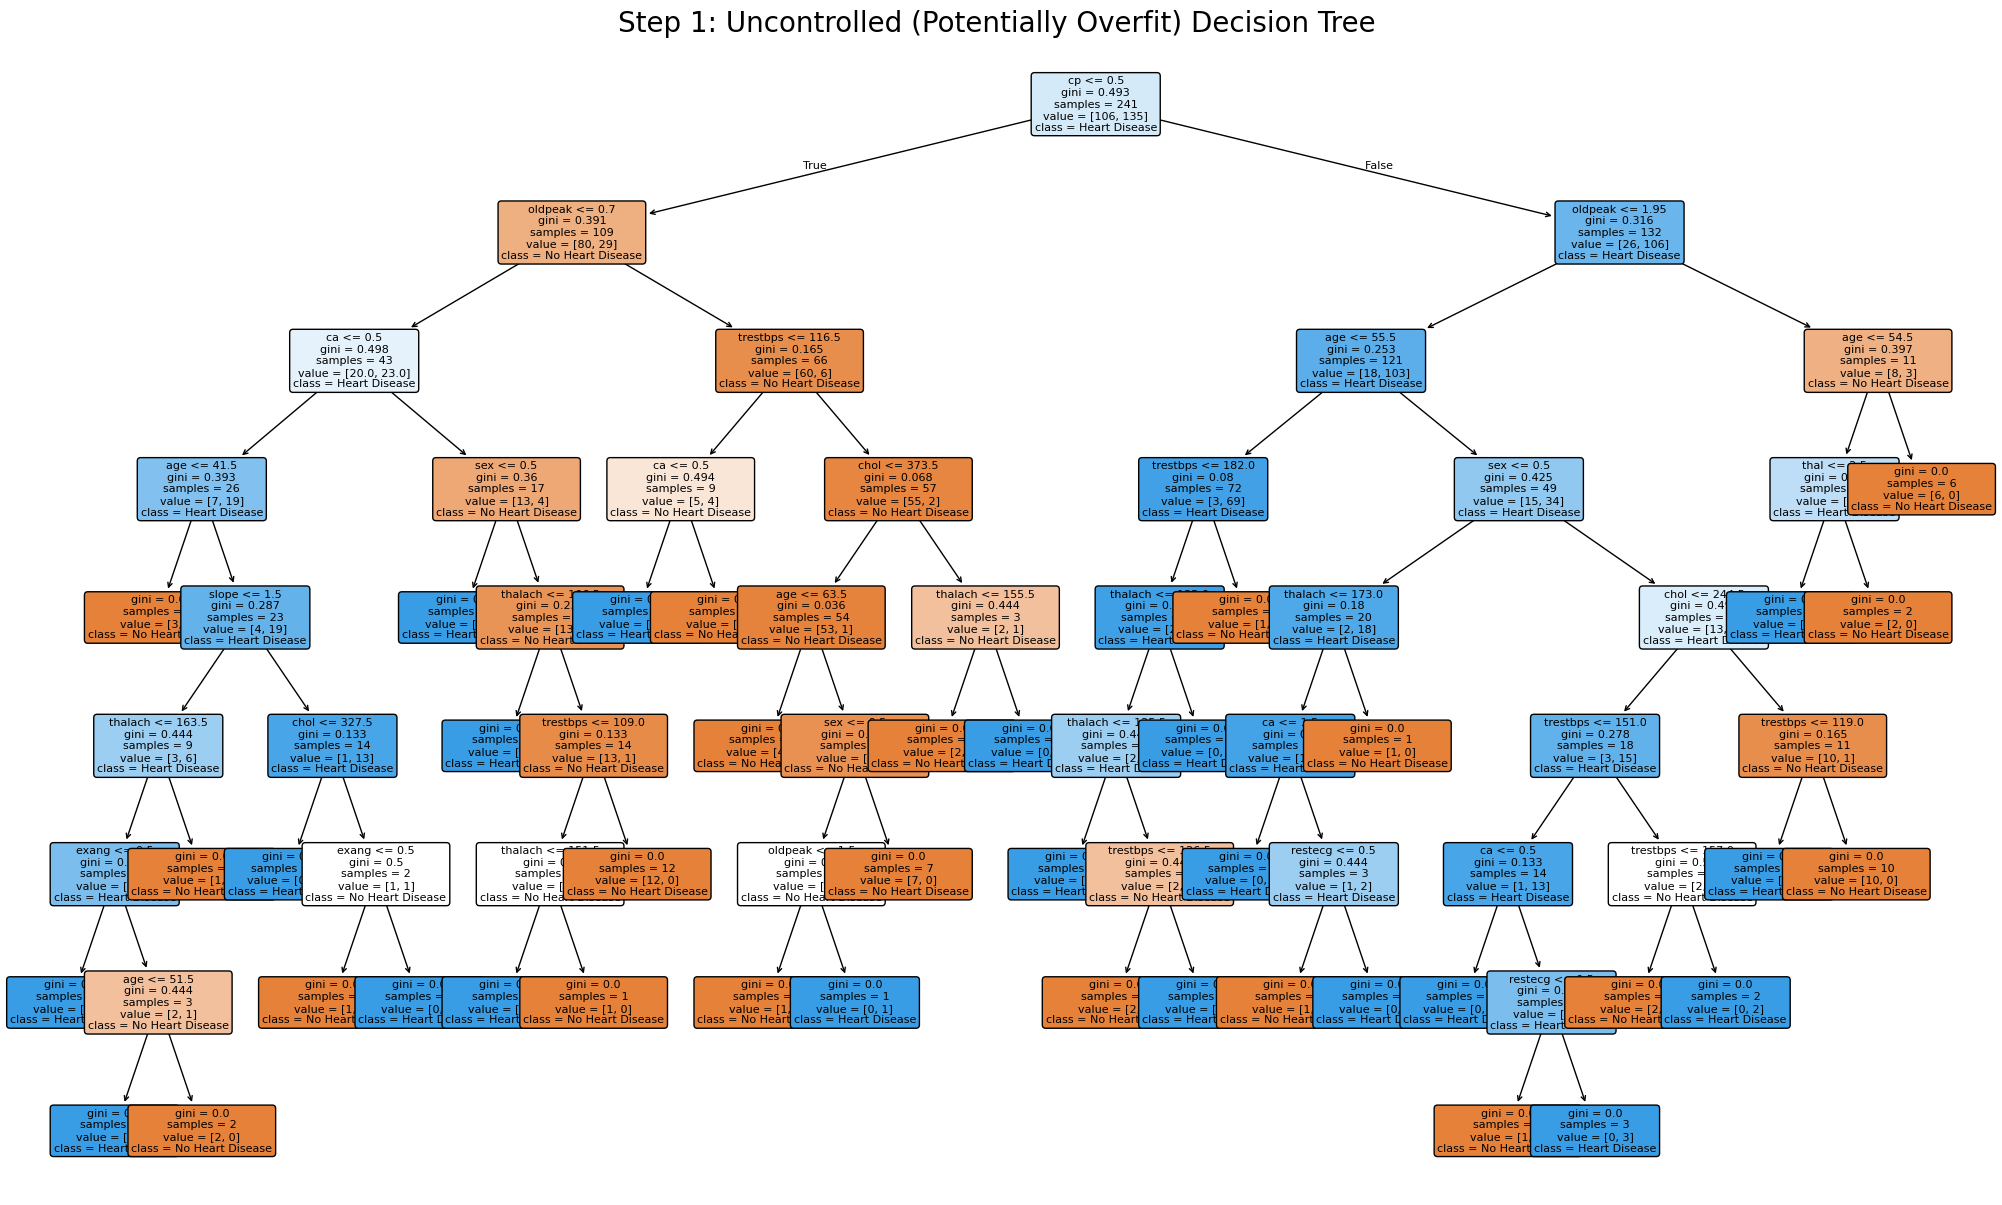

In [139]:
print("Full-sized tree trained. Now visualizing it...")
# Visualize the complex, uncontrolled tree
plt.figure(figsize=(25, 15))
plot_tree(
    uncontrolled_tree,
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Step 1: Uncontrolled (Potentially Overfit) Decision Tree", fontsize=20)
plt.show()

Conclusion for Step 1: Training a Basic Decision Tree

We built our first model. The goal of this model was to learn rules from the patient data to predict if someone has heart disease.

The model learns by asking questions. A decision tree works by finding the best yes/no questions to ask about the data (for example, "Is the patient's chest pain type less than 0.5?").

Our first tree was way too complex. The picture of the tree was huge and messy, with many branches and levels. This is our first clue that something is wrong.

It learned too many details. A tree this complex has learned the training data perfectly, including all the random noise and unimportant details.

This is a sign of memorizing. Instead of learning the general rules of what causes heart disease, the model has basically memorized the answer sheet for the training data. This is a problem called "overfitting."

This model cannot be trusted yet. Because it's just a memorizer, it will likely fail when it sees new patient data it has never seen before. It is not ready for the real world.

In [140]:
# =============================================================================
# --- Step 2: Analyze Overfitting and Control Tree Depth ---
# =============================================================================
print("--- Step 2: Analyzing Overfitting and Controlling Depth ---")
# Evaluate the uncontrolled tree
train_acc_uc = accuracy_score(y_train, uncontrolled_tree.predict(X_train))
test_acc_uc = accuracy_score(y_test, uncontrolled_tree.predict(X_test))
print(f"Uncontrolled Tree Training Accuracy: {train_acc_uc:.4f}")
print(f"Uncontrolled Tree Testing Accuracy:  {test_acc_uc:.4f}")
print("--> The large gap shows overfitting.\n")

--- Step 2: Analyzing Overfitting and Controlling Depth ---
Uncontrolled Tree Training Accuracy: 1.0000
Uncontrolled Tree Testing Accuracy:  0.7377
--> The large gap shows overfitting.



In [146]:
# Create a controlled classifier with max_depth=4
controlled_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
controlled_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [147]:
# Evaluate the controlled tree
train_acc_c = accuracy_score(y_train, controlled_tree.predict(X_train))
dt_test_acc = accuracy_score(y_test, controlled_tree.predict(X_test)) # Save for later comparison
print(f"Controlled Tree Training Accuracy: {train_acc_c:.4f}")
print(f"Controlled Tree Testing Accuracy:  {dt_test_acc:.4f}")
print("--> The gap is smaller, indicating a better, more generalized model.\n")
# Note: Visualization for the controlled tree is much more interpretable.
# plt.figure(figsize=(15, 8)); plot_tree(controlled_tree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True); plt.title("Step 2: Controlled Tree (max_depth=4)"); plt.show()

Controlled Tree Training Accuracy: 0.8963
Controlled Tree Testing Accuracy:  0.7377
--> The gap is smaller, indicating a better, more generalized model.



Conclusion for Step 2: Fixing the Overfitting Problem

We proved the model was memorizing. By testing it, we saw it got a perfect 100% on the training data it had memorized, but only about 74% on new, unseen test data. This big gap confirms it was overfitting.

We made the model simpler. To stop it from memorizing, we limited how "deep" the tree could grow. We set its maximum depth to 4 levels, forcing it to be simpler.

This is like "teaching" instead of "memorizing". By limiting the depth, we forced the model to only learn the most important patterns, not every tiny detail.

The new tree was more "honest". Its training score (around 90%) was much closer to its testing score (74%). The big gap between the scores got smaller.

Our model is now more "generalized". A generalized model is one that performs more predictably on new data. Even though it's not perfect, this simpler model is much more reliable and trustworthy than the first one.

We learned how to control our model. This step showed that we can change the model's settings (like max_depth) to improve its performance and make it more useful.

In [148]:
# =============================================================================
# --- Step 3: Train a Random Forest and Compare Accuracy ---
# =============================================================================
print("--- Step 3: Training a Random Forest Classifier ---")
# Create and train a Random Forest with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

--- Step 3: Training a Random Forest Classifier ---


RandomForestClassifier(random_state=42)

In [149]:
# Evaluate the Random Forest
train_acc_rf = accuracy_score(y_train, rf_classifier.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_classifier.predict(X_test)) # Save for comparison
print(f"Random Forest Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Testing Accuracy:  {rf_test_acc:.4f}\n")

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy:  0.8361



In [150]:
print("--- Accuracy Comparison ---")
print(f"Controlled Decision Tree Test Accuracy: {dt_test_acc:.4f}")
print(f"Random Forest Test Accuracy:            {rf_test_acc:.4f}\n")

--- Accuracy Comparison ---
Controlled Decision Tree Test Accuracy: 0.7377
Random Forest Test Accuracy:            0.8361



Conclusion for Step 3: Using a More Powerful Model (Random Forest)

We learned one tree can be wrong. A single decision tree can be unstable. We needed a better approach, so we decided to use a "team" of trees.

A Random Forest is a team of trees. This model works by creating 100 different decision trees and making them vote on the final answer. This is like asking a group of experts for their opinion.

The team was stronger than the individual. The Random Forest model got a higher accuracy score on the test data than our single, improved decision tree.

This "team" model is better at avoiding overfitting. Because so many trees are voting, the individual mistakes of one tree get cancelled out by the others. This makes the final result more accurate and stable.

Random Forest was the clear winner. For this problem, the Random Forest proved to be a better and more powerful model than a single Decision Tree.

We leveled up our modeling skills. We now know how to use a more advanced and robust model to get better results.

In [151]:
# =============================================================================
# --- Step 4: Interpret Feature Importances ---
# =============================================================================
print("--- Step 4: Interpreting Feature Importances from Random Forest ---")
# Get feature importances from the trained Random Forest model
importances = rf_classifier.feature_importances_
feature_names = X.columns

--- Step 4: Interpreting Feature Importances from Random Forest ---


In [152]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


In [153]:
print("Top 5 most important features:")
print(feature_importance_df.head())

Top 5 most important features:
    feature  importance
7   thalach    0.138781
2        cp    0.131618
9   oldpeak    0.117095
12     thal    0.101598
11       ca    0.090493


#### How Did the Model Get That Number??? (The Calculation) 
This is how the Random Forest calculates that "helpfulness" score. Let's use an analogy.

1. Imagine a Single Tree Sorting Balls

    Imagine you have a big bucket of blue and red balls all mixed up. This is your "impure" data.

    A decision tree's job is to sort these balls into pure buckets (one bucket of all red, one of all blue).

    At each step, the tree asks a question (like "Is thalach greater than 150?") to split the balls.

    A good question is one that creates much purer buckets. A question is important if it does a great job of separating the red and blue balls.

2. The Model Measures "Purity Improvement"

    For every single question it asks in a tree, the model measures how much purer the groups of data became after the split.

    A feature like thalach gets a high score if questions about it consistently lead to big improvements in purity.

3. It Averages Across All 100 Trees

    Now, remember your Random Forest is a team of 100 different trees.

    The model looks at every single split in all 100 trees.

    It calculates the average "purity improvement" that each feature (like thalach, cp, age) provided across the entire forest.

4. The Final Score

    The final importance number you see (like 0.1387) is this average score, scaled so that all the feature scores add up to 1.0.

    So, when you see thalach: 0.1387, it means that on average, across all 100 trees in your forest, questions about the patient's maximum heart rate were the most effective at sorting patients into the correct groups ("Heart Disease" vs. "No Heart Disease").

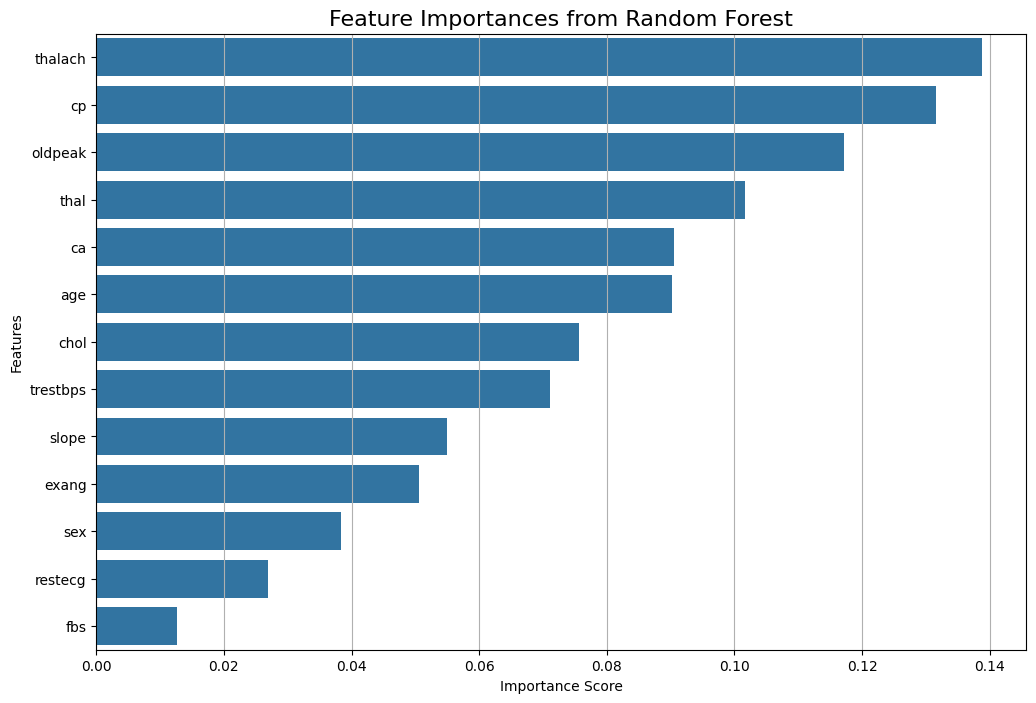

--> The plot shows which features the model found most predictive.



In [154]:
# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()
print("--> The plot shows which features the model found most predictive.\n")

Conclusion for Step 4: Understanding How the Model "Thinks"

We looked inside the model's brain. After building a good model, we wanted to know how it was making its decisions. What information was it using?

The model scores each feature's importance. The Random Forest can tell us which pieces of patient data (features) were the most helpful for making its predictions.

The bar chart ranked the clues. We created a chart that showed a ranked list of the most important factors. The features with the longest bars were the most powerful predictors.

We discovered the most important factors. We learned from the chart that things like thalach (maximum heart rate) ,cp (chest pain type) and oldpeak were the top clues the model used.

This builds trust and gives insight. This information is very valuable. It helps us trust that the model is using logical factors to make its predictions, and it can even give doctors insights into the data.

This step is about explanation, not accuracy. The goal here wasn't to make the model better, but to understand it better.

In [155]:
# =============================================================================
# --- Step 5: Evaluate Using Cross-Validation ---
# =============================================================================
print("--- Step 5: Evaluating Model Robustness with Cross-Validation ---")
# Use the best model (Random Forest) for cross-validation
# We use the full dataset (X, y) as cross_val_score handles the splitting
cv_scores = cross_val_score(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    X=X,
    y=y,
    cv=5, # Number of folds
    scoring='accuracy'
)

--- Step 5: Evaluating Model Robustness with Cross-Validation ---


In [156]:
print(f"Scores for each of the 5 folds: {np.round(cv_scores, 4)}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
print("--> This gives a more reliable estimate of how the model will perform on unseen data.")


Scores for each of the 5 folds: [0.8361 0.8197 0.9    0.8    0.7833]
Average CV Accuracy: 0.8278
Standard Deviation of CV Accuracy: 0.0402
--> This gives a more reliable estimate of how the model will perform on unseen data.


Conclusion for Step 5: Getting a Truly Reliable Score

One test is not enough. We realized our single test score could have been lucky or unlucky. To be really sure about our model's accuracy, we needed to test it more thoroughly.

Cross-Validation is like giving 5 different exams. We used a method that splits the data into 5 parts. It trains the model 5 times, each time using a different part as the "final exam."

Performance varies a little each time. The results showed us 5 different accuracy scores. This tells us how much the model's performance might change depending on the data it sees.

The average score is our best estimate. The average of these 5 scores (e.g., 82.8%) is our most trustworthy and realistic measure of how well our model will do on new, real-world data.

We confirmed our model is stable. The standard deviation was low, which means the 5 scores were all pretty close to each other. This tells us our model is consistent and reliable.

We now have a final, confident result. This final step gives us the highest confidence in our model. We can now report its accuracy with much more certainty.